# Periodic Variables

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

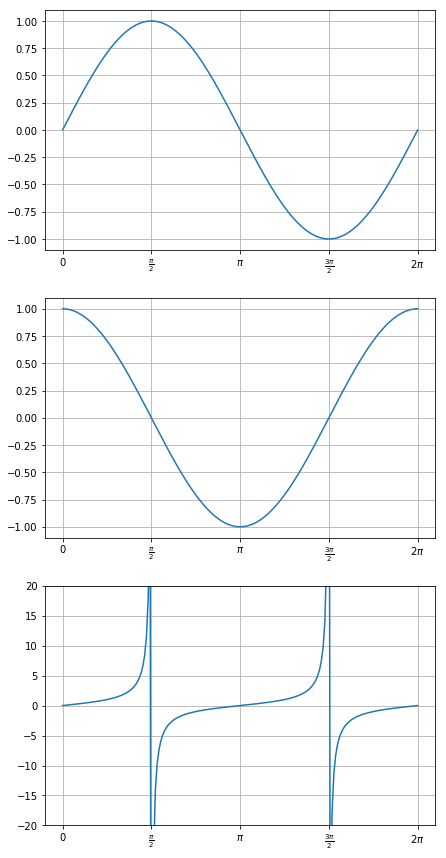

In [2]:
r_range = np.linspace(0, 2 * pi, 200)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 15))

ax[0].plot(r_range, np.sin(r_range))
ax[1].plot(r_range, np.cos(r_range))
ax[2].plot(r_range, np.tan(r_range))
ax[2].set_ylim(-20, 20)

for x in ax:
    x.grid()
    x.set_xticks([0, pi / 2, pi, 3 * pi / 2, 2 * pi])
    x.set_xticklabels(["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

In [3]:
np.random.seed(31415926)
thetas = np.random.randint(0, 360, size=5)
thetas = thetas * pi / 180 # np.deg2rad(thetas)
vcos = np.cos(thetas)
vsin = np.sin(thetas)

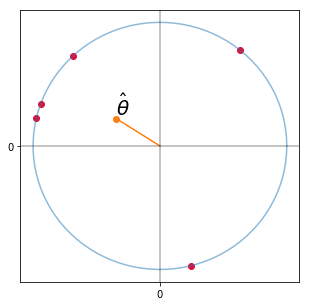

In [4]:
rs = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(5, 5))
plt.plot(np.cos(rs), np.sin(rs), alpha=0.5)
plt.scatter(vcos, vsin, c="crimson")
plt.scatter(vcos.mean(), vsin.mean(), c="tab:orange")
plt.plot((0, vcos.mean()), (0, vsin.mean()), c="tab:orange")
plt.text(vcos.mean(), vsin.mean(), r"$\hat \theta$", fontsize=20,
         horizontalalignment="left",
         verticalalignment="bottom");
plt.axvline(x="0", c="black", alpha=0.3)
plt.axhline(y="0", c="black", alpha=0.3);

The definition of the mean for a set of period variables $\{\theta_n\}_n$
$$
    \bar \theta = \tan^{-1}\left(\frac{\sum_n \sin(\theta_n)}{\sum_n \sin(\theta_n)}\right)
$$

Ensures that the location of the mean is **independent** of the origin of the angular coordinate.

In [5]:
np.arctan(vsin.sum() / vcos.sum())

-0.5698440542329537

In [6]:
np.arctan(np.sin(thetas - pi).sum() / np.cos(thetas - pi).sum())

-0.5698440542329536

## von Misses distributionn

The _von Mises_ distribution takes the form:
$$
    p(\theta|\theta_0, m) = \frac{1}{2\pi I_0(m)}\exp(m\cos(\theta - \theta_0))
$$

Where
* $\theta_0$ is the mean of the distribution
* $m$ is the precision of the distribution
* $I_0(m)$ is the zeroth-order Bessel function of the first kind

The idea behind the von Mises distribution is to find a gaussian-like distribution along a cirle with unit radius

In [7]:
def vMisses(x0, x1, mu0, mu1, sigma):
    return np.exp(- ((x0 - mu0) ** 2 + (x1 - mu1) ** 2) / (2 * sigma)) / (2 * pi * sigma)

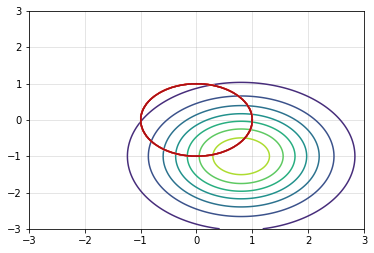

In [8]:
X, Y = np.mgrid[-3:3:0.005, -3:3:0.005]
plt.contour(X, Y, vMisses(X, Y, 0.8, -1, 1), )
plt.contour(X, Y, X**2 + Y ** 2 <= 1, cmap="Reds")
plt.grid(alpha=0.4)

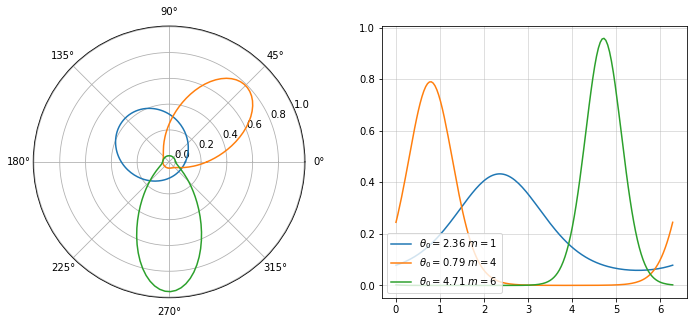

In [102]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection="polar")
ax2 = fig.add_subplot(122)

params = [(1, 3 * pi / 4), (4, pi / 4), (6, pi * 3 / 2)]

for m, theta_0 in params:
    npoints = 150
    theta = np.linspace(0, 2 * pi, npoints)
    von_mises = np.exp(m * np.cos(theta -  theta_0)) / (2 * pi * np.i0(m))

    ax1.plot(theta , von_mises);
    ax2.plot(theta, von_mises, label=r"$\theta_0={:0.2f} \ m={}$".format(theta_0, m))
ax2.grid(alpha=0.5)
ax2.legend(loc="lower left")